In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
df_oct = pd.read_csv("data/vumonic_india_food_delivery_20231001_20231031.csv", low_memory=False)
df_nov = pd.read_csv("data/vumonic_india_food_delivery_20231101_20231130.csv", low_memory=False)

# with open('data/vumonic_india_food_delivery_20231201_20231231.csv', 'r') as f:
#     first_line = f.readline()
# columns = first_line.replace('\n', '').split(',')
columns = df_nov.columns

df_dec = pd.read_csv('data/vumonic_india_food_delivery_20231201_20231231.csv', usecols=columns, encoding='latin-1', low_memory=False)

df = pd.concat([df_dec, df_nov, df_oct], ignore_index=True)
drop_columns = ['mid', 'year', 'day', 'order_promotion_discount', 
                'order_coupon_discount', 'order_seller_discount', 'order_delivery_discount',
                'order_status', 'order_delivery_discount', 'delivery_address_postal_code', 'order_payment_currency',
                'restaurant_address_postal_code', 'user_dob', 'user_address_postal_code', 'user_address_country']
df =  df.drop(drop_columns, axis=1)
df = df[df['user_age'] != 'male']

In [3]:
df

,transaction_id,company,sender_id,email_timestamp,month,product_name,product_price,product_quantity,product_total,order_subtotal,order_convenience_fee,order_packaging_fee,order_delivery_fee,order_tip,order_taxes,order_membership_fee,order_discount,order_membership_discount,order_amount_paid,order_discount_code,premium_membership,premium_membership_type,free_delivery,order_payment_type,delivery_address_city,delivery_address_state,restaurant_name,restaurant_address_city,restaurant_address_state,user_id,user_gender,user_age,user_address_city,user_address_state,user_device_brand,user_device_model,user_os_type,user_onboard_at,user_inactive_at
0,bfa86dc42518cc98cb1f6a5dc3ac6a5d,swiggy,noreply@swiggy.in,2023-12-01T00:08:24+00:00,12,Classic Chicken Roll,216.0,1.0,216.0,216.0,3.0,7.0,NaN,NaN,7.69,NaN,100.00,NaN,134.0,SWIGGYIT,True,swiggy_one,NaN,paytm,bangalore,karnataka,Rollsking,bangalore,karnataka,edb4a1a7320232810d47fdf695fdbeb1,male,23.0,Bengaluru,Karnataka,samsung,SM-G781B,android,2023-07-10T11:03:52.000Z,NaN
1,bfa86dc42518cc98cb1f6a5dc3ac6a5d,swiggy,noreply@swiggy.in,2023-12-01T00:08:24+00:00,12,Multigrain Laccha Paratha Roll,NaN,NaN,NaN,216.0,3.0,7.0,NaN,NaN,7.69,NaN,100.00,NaN,134.0,SWIGGYIT,True,swiggy_one,Free,paytm,bangalore,karnataka,Rollsking,bangalore,karnataka,edb4a1a7320232810d47fdf695fdbeb1,male,23.0,Bengaluru,Karnataka,samsung,SM-G781B,android,2023-07-10T11:03:52.000Z,NaN
2,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01T00:10:41+00:00,12,Double Cheese Slice,NaN,NaN,NaN,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,Free,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN
3,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01T00:10:41+00:00,12,Crispy Potato Burger,89.0,1.0,89.0,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,NaN,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN
4,614f8a99775ff921f7360f4140a7ba11,swiggy,noreply@swiggy.in,2023-12-01T00:10:41+00:00,12,Cheese Slice,NaN,NaN,NaN,256.0,3.0,10.0,NaN,NaN,8.84,NaN,99.99,NaN,178.0,FLATDEAL,True,swiggy_one,Free,bank,hyderabad,telangana,Shrimmers,hyderabad,telangana,a13bf807ac3741ae6d118472115fef00,male,28.0,Hyderabad,Telangana,realme,RMX3395,android,2023-05-02T22:38:13.000Z,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741079,9838db546bd880398bae5e8de6a68c3b,swiggy,noreply@swiggy.in,2023-10-26T19:23:37+00:00,10,Egg Curry 3 Eggs,200.0,1.0,200.0,330.0,3.0,20.0,9.0,NaN,13.35,NaN,124.99,NaN,250.0,SUPERSAVER,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Devi Homely Kitchen,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN
741080,abfb444e117e7958b0b618ddcae44e39,swiggy,noreply@swiggy.in,2023-10-29T10:37:05+00:00,10,Chicken Fry Piece Biryani Half,250.0,1.0,250.0,250.0,3.0,NaN,9.0,NaN,8.35,NaN,125.00,NaN,145.0,SWIGGYWEEKENDS,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Devi Homely Kitchen,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN
741081,084f0df866d7928acf1c8f332184dec9,swiggy,noreply@swiggy.in,2023-10-30T09:30:29+00:00,10,Chicken Fry Biryani,320.0,1.0,320.0,320.0,3.0,12.0,9.0,NaN,14.64,NaN,50.00,NaN,309.0,SWIGGYIT,NaN,NaN,NaN,NaN,eluru,andhra pradesh,Royal Family Restaurant,NaN,andhra pradesh,50b87b56ac5691d53f45015e6484fbbf,male,28.0,Hyderabad,Telangana,samsung,SM-M405F,android,2020-03-22T03:29:32.000Z,NaN
741082,ad320c16a2e04078f50af1416107bda2,swiggy,noreply@swiggy.in,2023-10-05T06:57:56+00:00,10,Veg Delight Pizza,109.0,3.0,327.0,327.0,NaN,NaN,NaN,NaN,10.79,NaN,40.00,NaN,

In [4]:
df[["month", "company", "premium_membership"]].groupby(["month", "company"]).count()

premium_membership
month company                    
10    swiggy                66294
      zomato                    0
11    swiggy                60912
      zomato                    0
12    swiggy                73380
      zomato                    0

In [5]:
gg = df[['month', 'company', 'restaurant_address_state', 'user_id', 'transaction_id', 'order_amount_paid']].groupby(['month', 'company', 'restaurant_address_state', 'user_id', 'transaction_id']).count().reset_index()
# gg

In [6]:
gg.groupby(['month', 'company', 'restaurant_address_state', 'user_id']).count()

transaction_id  \
month company restaurant_address_state  user_id                                            
10    swiggy  andaman & nicobar islands 0639b3fc2102209bd35f8c3b1dcd12c6               2   
                                        097cfd1653b08d2ebda2fc10adad0b62              11   
                                        2f2e39d15eeba11b53a251544c5290fc               3   
                                        43e0e5a4337ae6354010f37bf2f591b3               5   
                                        639a781c4e567537b891ad2f0a85111f               2   
...                                                                                  ...   
12    zomato  west bengal               fdead68a094efa2e7a5e254ca1725e72               1   
                                        ff68edd9d1b54af13343f9b4de4676c9               1   
                                        ff77c9e430632c7a926748ba92fa022a               3   
                                        ffe3e72f9d078e91bf3c2765449729b9               5   
                                        ffef56f881973b6cf5eecacb17b40a69               5   

                                                                          order_amount_paid  
month company restaurant_address_state  user_id                                              
10    swiggy  andaman & nicobar islands 0639b3fc2102209bd35f8c3b1dcd12c6                  2  
                                        097cfd1653b08d2ebda2fc10adad0b62                 11  
                                        2f2e39d15eeba11b53a251544c5290fc                  3  
                                        43e0e5a4337ae6354010f37bf2f591b3                  5  
                                        639a781c4e567537b891ad2f0a85111f                  2  
...                                                                                     ...  
12    zomato  west bengal               fdead68a094efa2e7a5e254ca1725e72                  1  
                                        ff68edd9d1b54af13343f9b4de4676c9                  1  
                                        ff77c9e430632c7a926748ba92fa022a                  3  
                                        ffe3e72f9d078e91bf3c2765449729b9                  5  
                                        ffef56f881973b6cf5eecacb17b40a69                  5  

[103325 rows x 2 columns]

In [7]:
gg = df[['month', 'company', 'restaurant_address_state', 'user_id', 'transaction_id', 'order_subtotal']].groupby(['month', 'company', 'restaurant_address_state', 'user_id', 'transaction_id']).count().reset_index()
gg = gg.groupby(['month', 'company', 'restaurant_address_state']).count().reset_index()[['month', 'company', 'restaurant_address_state', 'user_id']]
gg

,month,company,restaurant_address_state,user_id
0,10,swiggy,andaman & nicobar islands,52
1,10,swiggy,andhra pradesh,2580
2,10,swiggy,assam,541
3,10,swiggy,bihar,518
4,10,swiggy,chandigarh,282
...,...,...,...,...
191,12,zomato,telangana,4374
192,12,zomato,tripura,48
193,12,zomato,uttar pradesh,5223
194,12,zomato,uttarakhand,455


In [8]:
mm = gg[gg["restaurant_address_state"] == "assam"]
mm

,month,company,restaurant_address_state,user_id
2,10,swiggy,assam,541
35,10,zomato,assam,554
66,11,swiggy,assam,261
99,11,zomato,assam,547
131,12,swiggy,assam,453
166,12,zomato,assam,625


In [12]:
gg

,month,company,restaurant_address_state,user_id
0,10,swiggy,andaman & nicobar islands,52
1,10,swiggy,andhra pradesh,2580
2,10,swiggy,assam,541
3,10,swiggy,bihar,518
4,10,swiggy,chandigarh,282
...,...,...,...,...
191,12,zomato,telangana,4374
192,12,zomato,tripura,48
193,12,zomato,uttar pradesh,5223
194,12,zomato,uttarakhand,455


In [13]:
# Sort the DataFrame by month
gg = gg.sort_values(['company', 'restaurant_address_state', 'month'])

# Create a new column to store the percentage difference
gg['percentage_diff'] = 0.0

# Iterate over the DataFrame
for i in range(1, len(gg)):
    if gg.iloc[i]['company'] == gg.iloc[i - 1]['company'] and gg.iloc[i]['restaurant_address_state'] == gg.iloc[i - 1]['restaurant_address_state']:
        diff = gg.iloc[i]['user_id'] / gg.iloc[i - 1]['user_id'] - 1
        gg.at[gg.index[i], 'percentage_diff'] = diff * 100

In [14]:
gg

,month,company,restaurant_address_state,user_id,percentage_diff
0,10,swiggy,andaman & nicobar islands,52,0.000000
64,11,swiggy,andaman & nicobar islands,32,-38.461538
129,12,swiggy,andaman & nicobar islands,60,87.500000
1,10,swiggy,andhra pradesh,2580,0.000000
65,11,swiggy,andhra pradesh,1745,-32.364341
...,...,...,...,...,...
127,11,zomato,uttarakhand,371,-16.441441
194,12,zomato,uttarakhand,455,22.641509
63,10,zomato,west bengal,3220,0.000000
128,11,zomato,west bengal,2789,-13.385093


In [15]:
len(gg.restaurant_address_state.unique())

35

In [16]:
gg.groupby('month').sum()

,user_id,percentage_diff
month,,
10,133741,0.000000
11,107708,-1131.134598
12,123192,2296.794227


In [17]:
gg.groupby(['month', 'company']).sum().reset_index().sort_values(['company', 'month'])

,month,company,user_id,percentage_diff
0,10,swiggy,66865,0.000000
2,11,swiggy,45635,-1122.632397
4,12,swiggy,60854,2026.502463
1,10,zomato,66876,0.000000
3,11,zomato,62073,-8.502201
5,12,zomato,62338,270.291764


In [18]:
gga = gg.groupby(['month', 'company']).sum().sort_values(['company', 'month']).reset_index()
gga.percentage_diff = 0.0

for i in range(1, len(gga)):
    if gga.iloc[i]['company'] == gga.iloc[i - 1]['company']:
        diff = gga.iloc[i]['user_id'] / gga.iloc[i - 1]['user_id'] - 1
        gga.at[gga.index[i], 'percentage_diff'] = diff * 100

gga

,month,company,user_id,percentage_diff
0,10,swiggy,66865,0.000000
1,11,swiggy,45635,-31.750542
2,12,swiggy,60854,33.349403
3,10,zomato,66876,0.000000
4,11,zomato,62073,-7.181949
5,12,zomato,62338,0.426917


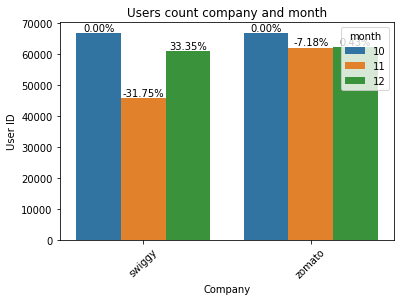

In [19]:
gga = gga.sort_values(['month', 'company'])
gga.month = gga.month.astype('str')

ax = sns.barplot(x='company', y='user_id', hue='month', data=gga)
plt.title(f"Users count company and month")
plt.xlabel('Company')
plt.ylabel('User ID')

plt.tick_params(axis='x', rotation=45)    

# Add percentage_diff above each bar
for index, bar in enumerate(ax.patches):
    height = bar.get_height()
    percentage_diff = gga.iloc[index]['percentage_diff']
    plt.annotate(f'{percentage_diff:.2f}%', (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom')
    
plt.show()

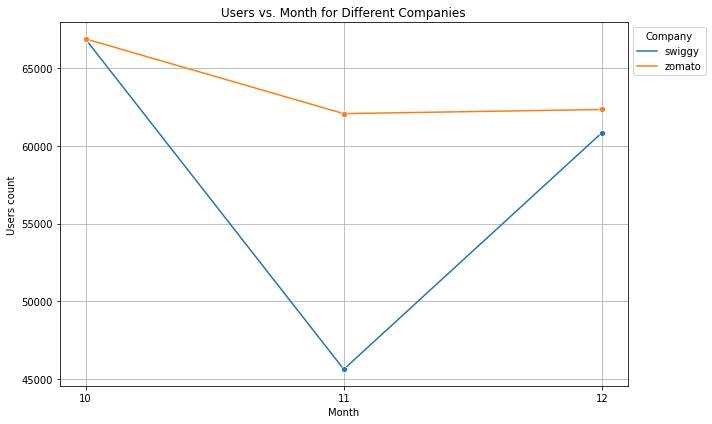

In [29]:
# Assuming 'month', 'company', and 'user_id' are columns in your DataFrame 'gga'
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='user_id', hue='company', data=gga, marker='o')
plt.title('Users vs. Month for Different Companies')
plt.xlabel('Month')
plt.ylabel('Users count')
plt.grid(True)
plt.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
states = gg.groupby('restaurant_address_state').sum().sort_values('user_id').index[-10:].tolist()

In [22]:
ggs = gg[gg["restaurant_address_state"].isin(states)]
ggs

,month,company,restaurant_address_state,user_id,percentage_diff
7,10,swiggy,delhi,4325,0.000000
71,11,swiggy,delhi,3501,-19.052023
137,12,swiggy,delhi,4066,16.138246
9,10,swiggy,gujarat,2684,0.000000
73,11,swiggy,gujarat,1506,-43.889717
139,12,swiggy,gujarat,2236,48.472776
10,10,swiggy,haryana,2566,0.000000
74,11,swiggy,haryana,1930,-24.785659
140,12,swiggy,haryana,2148,11.295337
14,10,swiggy,karnataka,10380,0.000000


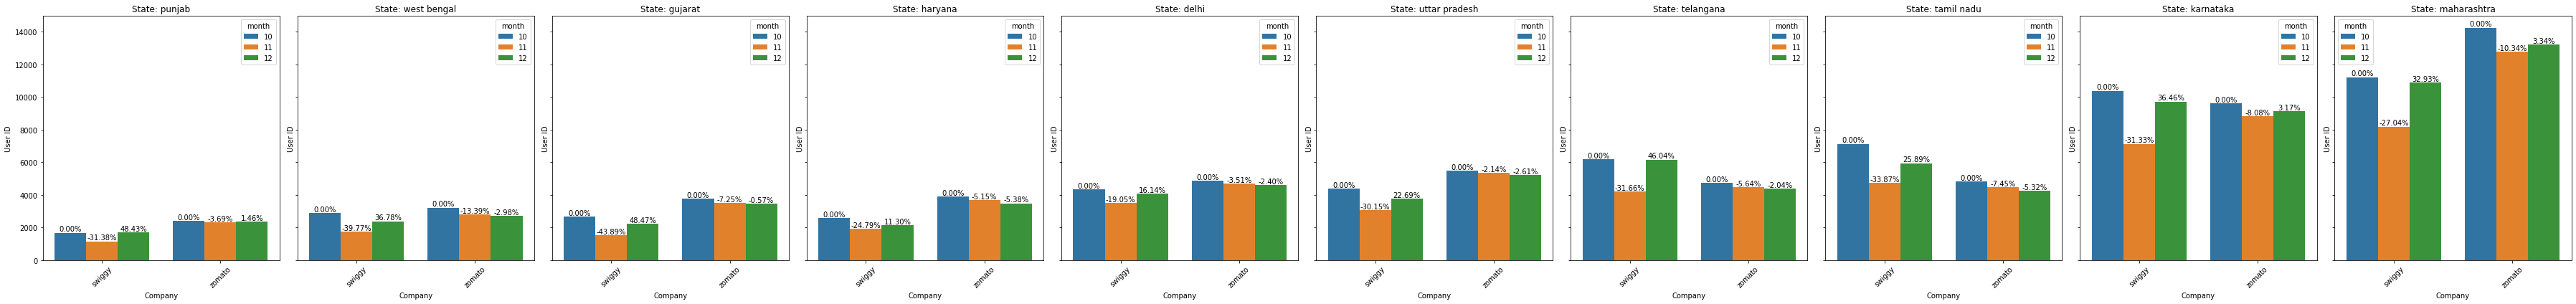

In [23]:


# Create a figure with subplots for each state
fig, axs = plt.subplots(1, 10, figsize=(50, 6), sharey=True)

# Plot for each state
for i, state in enumerate(states):
    df_state = ggs[ggs['restaurant_address_state'] == state].sort_values(['restaurant_address_state', 'month']).reset_index(drop=True)
    sns.barplot(x='company', y='user_id', hue='month', data=df_state, ax=axs[i])
    axs[i].set_title(f"State: {state}")
    axs[i].set_xlabel('Company')
    axs[i].set_ylabel('User ID')

    axs[i].tick_params(axis='x', rotation=45)    
    
    # Add percentage_diff above each bar
    for index, bar in enumerate(axs[i].patches):
        height = bar.get_height()
        percentage_diff = df_state.iloc[index]['percentage_diff']
        axs[i].annotate(f'{percentage_diff:.2f}%', (bar.get_x() + bar.get_width() / 2, height),
                        ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [24]:
df_state

,month,company,restaurant_address_state,user_id,percentage_diff
0,10,swiggy,maharashtra,11216,0.000000
1,10,zomato,maharashtra,14252,0.000000
2,11,swiggy,maharashtra,8183,-27.041726
3,11,zomato,maharashtra,12779,-10.335392
4,12,swiggy,maharashtra,10878,32.934132
5,12,zomato,maharashtra,13206,3.341420


In [25]:
index

5

In [26]:
df_state.iloc[index]['percentage_diff']

3.341419516394084

In [27]:
df[df["company"] == "zomato"]

,transaction_id,company,sender_id,email_timestamp,month,product_name,product_price,product_quantity,product_total,order_subtotal,order_convenience_fee,order_packaging_fee,order_delivery_fee,order_tip,order_taxes,order_membership_fee,order_discount,order_membership_discount,order_amount_paid,order_discount_code,premium_membership,premium_membership_type,free_delivery,order_payment_type,delivery_address_city,delivery_address_state,restaurant_name,restaurant_address_city,restaurant_address_state,user_id,user_gender,user_age,user_address_city,user_address_state,user_device_brand,user_device_model,user_os_type,user_onboard_at,user_inactive_at
127689,9bfb4f8521013f5b7e8b3cc01e6e6323,zomato,noreply@zomato.com,2023-12-27T17:10:20+00:00,12,Chicken curry,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.31,NaN,NaN,NaN,NaN,NaN,mysore,karnataka,Doll Kitchen,mysore,karnataka,c62bd9fb4bb9b467797dea1a7af13ced,male,25.0,Bengaluru,Karnataka,samsung,SM-A515F,android,2020-05-27T06:35:16.000Z,NaN
127690,524913a62852198f88cc98687216e484,zomato,noreply@zomato.com,2023-12-16T14:37:14+00:00,12,Chicken Cheese Rumali Shawarma,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.46,NaN,NaN,NaN,NaN,NaN,ernakulam,kerala,Mr Shawarma,ernakulam,kerala,9f4b31db61498c53cf578320fa3dc19f,female,32.0,Ernakulam,Kerala,samsung,SM-F415F,android,2022-03-18T08:56:14.000Z,NaN
127691,524913a62852198f88cc98687216e484,zomato,noreply@zomato.com,2023-12-16T14:37:14+00:00,12,Chicken Shawarma Roll,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.46,NaN,NaN,NaN,NaN,NaN,ernakulam,kerala,Mr Shawarma,ernakulam,kerala,9f4b31db61498c53cf578320fa3dc19f,female,32.0,Ernakulam,Kerala,samsung,SM-F415F,android,2022-03-18T08:56:14.000Z,NaN
127692,7c0e513997dfa0ff6dc050357bedf8e0,zomato,noreply@zomato.com,2023-12-17T05:08:53+00:00,12,Tomato Uttapam,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.81,NaN,NaN,NaN,NaN,NaN,khammam,telangana,Gupta Udipi Aahaar,khammam,telangana,1ca3b96c312309f178ef9512d0cb2725,male,36.0,Khammam,Telangana,samsung,SM-G781B,android,2021-10-24T23:49:10.000Z,NaN
127693,7c0e513997dfa0ff6dc050357bedf8e0,zomato,noreply@zomato.com,2023-12-17T05:08:53+00:00,12,Onion Dosa,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.81,NaN,NaN,NaN,NaN,NaN,khammam,telangana,Gupta Udipi Aahaar,khammam,telangana,1ca3b96c312309f178ef9512d0cb2725,male,36.0,Khammam,Telangana,samsung,SM-G781B,android,2021-10-24T23:49:10.000Z,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602631,3e031eb124d2586b71ba41c9b76d23eb,zomato,noreply@zomato.com,2023-10-31T19:56:30+00:00,10,2 Rumali Roti with Paneer Butter Masala,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adbuthahao,vijayawada,andhra pradesh,91c32bffb5722657f605d6f1a9c4ebf3,male,28.0,Vijayawada,Andhra Pradesh,OnePlus,IV2201,android,2023-06-26T11:06:40.000Z,NaN
602632,81c1f70c9c817c570588d9d0286934e2,zomato,noreply@zomato.com,2023-10-31T20:14:40+00:00,10,Veg Makhani Burst Burger Medium Peri Peri Fries,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burger King,mumbai,maharashtra,672122f4086e356bb87ae546d9727d58,male,24.0,Botad,Gujarat,OnePlus,DN2101,android,2020-03-28T10:56:22.000Z,NaN
602633,81c1f70c9c817c570588d9d0286934e2,zomato,noreply@zomato.com,2023-10-31T20:14:40+00:00,10,Hot N Cheezy Burger,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burger King,mumbai,maharashtra,672122f4086e356bb87ae546d9727d58,male,24.0,Botad,Gujarat,OnePlus,DN2101,android,2020-03-28T10:56:22.000Z,NaN
602634,e931bb504e32bd0223437fba9a252faa,zomato,noreply@zomato.com,2023-10-31T20:30:39+00:00,10,Double Crispy Veg Double Crispy Veg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Burger King,jaipur,rajasthan,9341ebc11bb927ea43d52dc7d65279d4,male,20.0,Jaipur,Rajasthan,Infinix,Infinix X670,android,2023-04-17T

In [28]:
df[['month', 'company', 'restaurant_address_state', 'user_id', 'transaction_id', 'order_subtotal']].groupby(['month', 'company', 'restaurant_address_state']).count().reset_index()


,month,company,restaurant_address_state,user_id,transaction_id,order_subtotal
0,10,swiggy,andaman & nicobar islands,90,90,90
1,10,swiggy,andhra pradesh,4111,4111,4111
2,10,swiggy,assam,912,912,912
3,10,swiggy,bihar,840,840,840
4,10,swiggy,chandigarh,594,594,594
...,...,...,...,...,...,...
191,12,zomato,telangana,7039,7039,0
192,12,zomato,tripura,92,92,0
193,12,zomato,uttar pradesh,9202,9202,0
194,12,zomato,uttarakhand,794,794,0
